In [41]:
import numpy as np
import scipy.io, scipy.ndimage
import pandas as pd
import matplotlib.pyplot as plt

___Part 1: K-means___

In [42]:
data1 = scipy.io.loadmat("ex7data1.mat")
data2 = scipy.io.loadmat("ex7data2.mat")
Xdata1 = data1['X']
Xdata2 = data2['X']

In [43]:
def find_closest_centroid(X, centroids):
    k = centroids.shape[0]
    m = X.shape[0]
    distances = np.zeros((m,k))
    for index, c in enumerate(centroids):
        distances[:, index] = np.linalg.norm(X - c, axis=1)
    return np.argmin(distances, axis=1)

In [44]:
def compute_centroids(X, closest, k):
    dim = X.shape[1]
    centroids = np.zeros((k,dim))
    for i in range(k):
        indices = np.argwhere(closest == i).ravel()
        centroids[i] = np.mean(np.take(X, indices, axis=0), axis=0)
    return centroids

In [45]:
def kmeans_centroids(X, k, iters):
    init_centroids = np.random.permutation(X)[:k,]
    for i in range(iters):
        closest = find_closest_centroid(X, init_centroids)
        init_centroids = compute_centroids(X, closest, k)
    return init_centroids

In [46]:
c = kmeans_centroids(Xdata2, 3, 50)

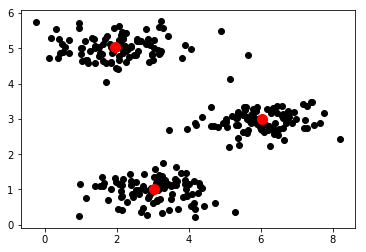

In [47]:
plt.scatter(Xdata2.transpose()[0], Xdata2.transpose()[1], color='black')
plt.scatter(c.transpose()[0], c.transpose()[1], color='red',s=100)

In [48]:
bird = plt.imread("bird_small.png")
print(bird.shape)

(128, 128, 3)


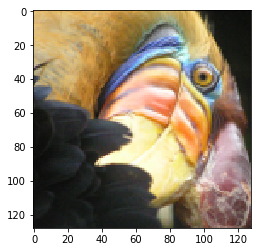

In [49]:
plt.imshow(bird)

In [69]:
bird = bird.reshape(128*128, 3)
colors = kmeans_centroids(bird, 16, 200)
bird_colors = find_closest_centroid(bird, colors)
bird_compressed = np.apply_along_axis(lambda x: colors[x], 0, bird_colors)
bird_compressed = bird_compressed.reshape((128,128,3))

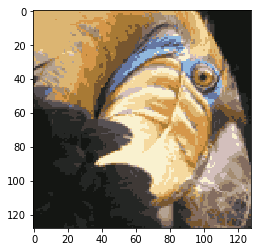

In [70]:
plt.imshow(bird_compressed)

___Part 2: PCA___


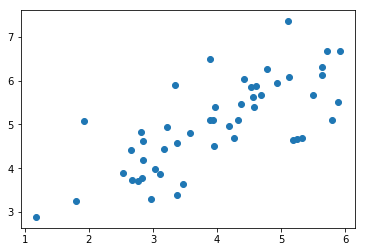

In [72]:
plt.scatter(Xdata1.transpose()[0], Xdata1.transpose()[1])

Using my `feature_normalize` from ex5

In [73]:
def feature_normalize(X):
    subtract_mean = lambda x: x - np.mean(x)
    scale = lambda x: x/np.std(x)
    X_normalized = np.apply_along_axis(subtract_mean, 0, X)
    X_normalized = np.apply_along_axis(scale, 0, X_normalized)
    return X_normalized

In [74]:
Xnorm = feature_normalize(Xdata1)

In [76]:
cov = 1/(Xnorm.shape[0])*Xnorm.transpose().dot(Xnorm)

In [77]:
cov

array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

In [79]:
U, S, V = np.linalg.svd(cov)

In [80]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


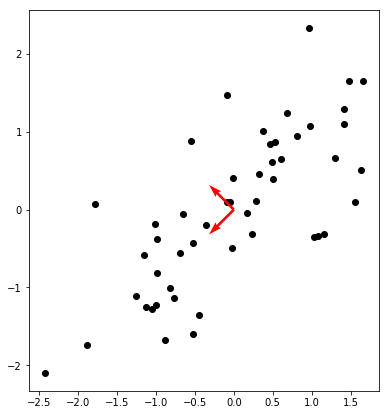

In [138]:
plt.figure(figsize=(7,7))
plt.scatter(Xnorm.transpose()[0], Xnorm.transpose()[1], color='black')
plt.quiver([0, 0], [0, 0], U.transpose()[0], U.transpose()[1], color = 'red', scale=10, angles='xy')
plt.axes().set_aspect('equal')

In [111]:
def project_data(x, u, k):
    u_reduce = u[:, 0:k]
    x_proj = np.zeros((x.shape[0], k))
    for i in range(k):
        x_proj[:, i] = u_reduce[:, i].dot(x.transpose())
    return x_proj

In [117]:
Xproj = project_data(Xnorm, U, 1)

In [123]:
def recover_data(x_proj, u):
    k = x_proj.shape[1]
    return x_proj.dot(u[:,0:k].transpose())

In [124]:
X_recovered = recover_data(Xproj, U)

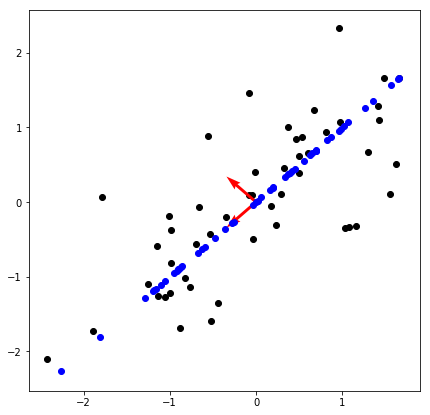

In [139]:
plt.figure(figsize=(7,7))
plt.scatter(Xnorm.transpose()[0], Xnorm.transpose()[1], color='black')
plt.quiver([0, 0], [0, 0], U.transpose()[0], U.transpose()[1], color = 'red', scale=10, angles='xy')
plt.scatter(X_recovered.transpose()[0], X_recovered.transpose()[1], color='blue')

In [140]:
face_data = scipy.io.loadmat("ex7faces.mat")

In [164]:
X_faces = face_data['X']
X_faces.shape
X_faces_bitmap = X_faces.reshape(5000, 32, 32, order='F')

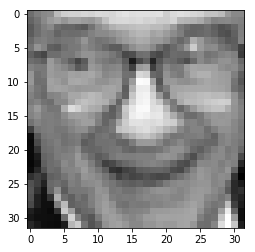

In [207]:
plt.imshow(X_faces_bitmap[0], cmap='gray')

In [162]:
def principal_components(X):
    X = feature_normalize(X)
    covX = 1/(X.shape[0])*(X.transpose().dot(X))
    u, s, v = np.linalg.svd(covX)
    return u

In [167]:
U_face = principal_components(X_faces)

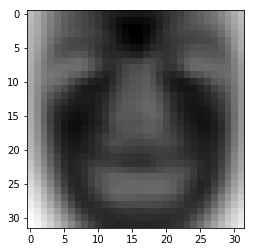

In [204]:
plt.imshow(U_face[:,0].reshape(32, 32, order='F'), cmap='gray')

In [202]:
X_faces_proj = project_data(X_faces, U_face, 25)
X_faces_recovered = recover_data(X_faces_proj, U_face)
X_faces_rec_bitmap = X_faces_recovered.reshape(5000, 32, 32, order='F')

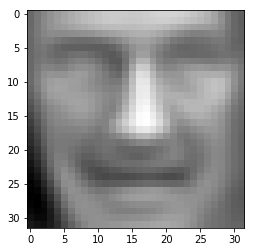

In [208]:
plt.figure()
plt.imshow(X_faces_rec_bitmap[0], cmap='gray')